<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [4]:
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
print(train_data.data.size())
print(train_data.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


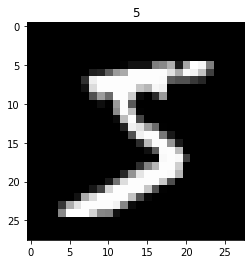

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [7]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7efc42065410>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7efc4205c250>}

In [8]:
'''
feed_foward_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(8, activation="sigmoid"),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
'''

'\nfeed_foward_model = keras.Sequential(\n    [\n        keras.Input(shape=input_shape),\n        keras.layers.Dense(16, activation="sigmoid"),\n        keras.layers.Dense(8, activation="sigmoid"),\n        keras.layers.Flatten(),\n        keras.layers.Dropout(0.5),\n        keras.layers.Dense(num_classes, activation="softmax"),\n    ]\n)\n'

In [9]:
import torch.nn as nn
class MiniLightAlexNet(nn.Module):
    def __init__(self):
        super(MiniLightAlexNet, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(1, 16, 10, 2, 0),     
            nn.ReLU(),                      
            nn.Dropout(0.5)                
        )

        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 8, 10, 2, 0),     
            nn.ReLU(),                      
            nn.Dropout(0.5)                
        )


        # fully connected layer, output 10 classes
        self.out = nn.Linear(8, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [10]:
cnn = MiniLightAlexNet()
print(cnn)

MiniLightAlexNet(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(10, 10), stride=(2, 2))
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 8, kernel_size=(10, 10), stride=(2, 2))
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (out): Linear(in_features=8, out_features=10, bias=True)
)


In [11]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [12]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [13]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            # clear gradients for this training step   
            optimizer.zero_grad()           
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            if (i+1) % 100 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
              pass
            pass
        pass

train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 1.4387
Epoch [1/10], Step [200/600], Loss: 1.5900
Epoch [1/10], Step [300/600], Loss: 1.2928
Epoch [1/10], Step [400/600], Loss: 1.2578
Epoch [1/10], Step [500/600], Loss: 1.4513
Epoch [1/10], Step [600/600], Loss: 1.5127
Epoch [2/10], Step [100/600], Loss: 1.2371
Epoch [2/10], Step [200/600], Loss: 1.4798
Epoch [2/10], Step [300/600], Loss: 1.3545
Epoch [2/10], Step [400/600], Loss: 1.3464
Epoch [2/10], Step [500/600], Loss: 1.2341
Epoch [2/10], Step [600/600], Loss: 1.1834
Epoch [3/10], Step [100/600], Loss: 1.2546
Epoch [3/10], Step [200/600], Loss: 1.2964
Epoch [3/10], Step [300/600], Loss: 1.2417
Epoch [3/10], Step [400/600], Loss: 1.3374
Epoch [3/10], Step [500/600], Loss: 1.1104
Epoch [3/10], Step [600/600], Loss: 1.0616
Epoch [4/10], Step [100/600], Loss: 1.3788
Epoch [4/10], Step [200/600], Loss: 1.1702
Epoch [4/10], Step [300/600], Loss: 1.3758
Epoch [4/10], Step [400/600], Loss: 1.2487
Epoch [4/10], Step [500/600], Loss: 1.1347
Epoch [4/10

In [18]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    pass
test()

Test Accuracy of the model on the 10000 test images: 0.99


In [19]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [20]:
actual_number = lbls[:10].numpy()
actual_number

array([9, 0, 1, 5, 2, 4, 2, 7, 7, 3])

In [21]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [9 0 1 5 2 4 2 7 7 3]
Actual number: [9 0 1 5 2 4 2 7 7 3]
